<a href="https://colab.research.google.com/github/teixeirah-eth/ELT-574/blob/main/Semana_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ELT574 - Aprendizado de Máquinas**
**Curso de Especialização em Inteligência Artificial e Computacional**



## Semana 4 - Lógica Fuzzy

Preparação do ambiente de programação e importação das principais bibliotecas.

In [ ]:
#Importando as bibliotecas para análise do problema e configurando o notebook

## OS para executar comandos de diretorio
import os

## Habilitar Google Drive no Colab
# from google.colab import drive
# drive.mount('/content/drive')

## NumPy para manipular matrizes e vetores
import numpy as np

## Pandas para manipular os dataframes
import pandas as pd

## Plotar figuras bonitas
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns

print('Setup completo!')

Setup completo!


### Aula 1 - Sistema de Lógica Fuzzy

Simpful é uma biblioteca em Python para lógica fuzzy, desenvolvida para ser uma API simples e leve, o mais próximo possível da linguagem natural.

https://simpful.readthedocs.io/en/latest/

In [ ]:
!pip install simpful
import simpful as sf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### Conjuntos fuzzy

##### Funções de pertinência

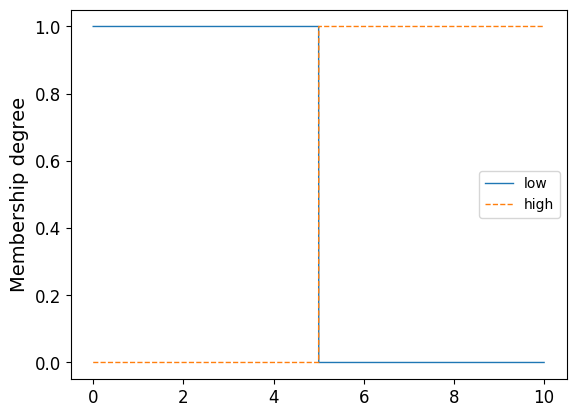

In [ ]:
# Logica booleana tradicional
C_1 = sf.CrispSet(a=0, b=5, term="low")
C_2 = sf.CrispSet(a=5, b=10, term="high")
sf.LinguisticVariable([C_1, C_2], universe_of_discourse=[0, 10]).plot()

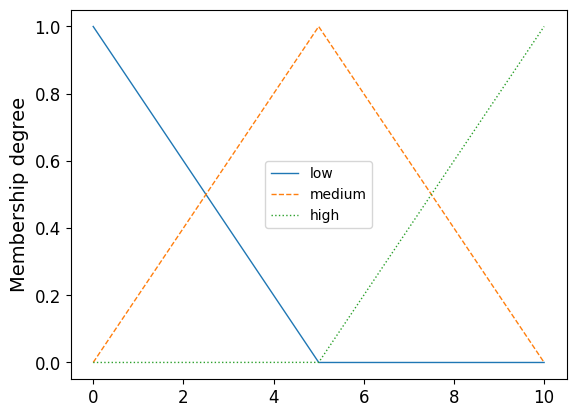

In [ ]:
# Triangular
Tri_1 = sf.TriangleFuzzySet(a=0, b=0, c=5, term="low")
Tri_2 = sf.TriangleFuzzySet(a=0, b=5, c=10, term="medium")
Tri_3 = sf.TriangleFuzzySet(a=5, b=10, c=10, term="high")
sf.LinguisticVariable([Tri_1, Tri_2, Tri_3], universe_of_discourse=[0, 10]).plot()

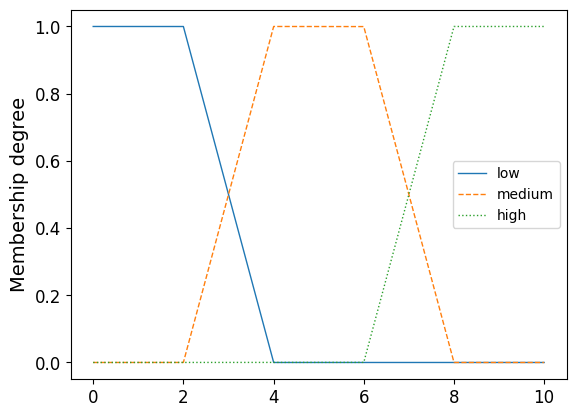

In [ ]:
# Trapezoidal
Tra_1 = sf.TrapezoidFuzzySet(a=0, b=0, c=2, d=4, term="low")
Tra_2 = sf.TrapezoidFuzzySet(a=2, b=4, c=6, d=8, term="medium")
Tra_3 = sf.TrapezoidFuzzySet(a=6, b=8, c=10, d=10, term="high")
sf.LinguisticVariable([Tra_1, Tra_2, Tra_3], universe_of_discourse=[0, 10]).plot()

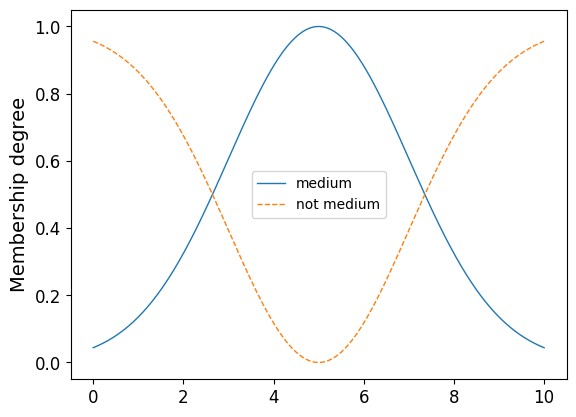

In [ ]:
# Gaussian
G_1 = sf.GaussianFuzzySet(mu=5, sigma=2, term="medium")
G_2 = sf.InvGaussianFuzzySet(mu=5, sigma=2, term="not medium")
sf.LinguisticVariable([G_1, G_2], universe_of_discourse=[0, 10]).plot()

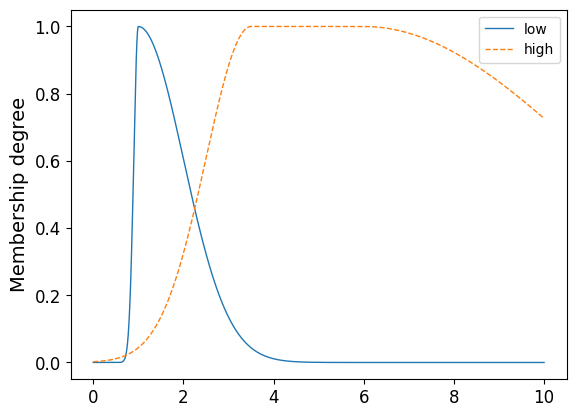

In [ ]:
# Double Gaussian
DG_1 = sf.DoubleGaussianFuzzySet(mu1=1, sigma1=0.1, mu2=1, sigma2=1, term="low")
DG_2 = sf.DoubleGaussianFuzzySet(mu1=3.5, sigma1=1, mu2=6, sigma2=5, term="high")
sf.LinguisticVariable([DG_1, DG_2], universe_of_discourse=[0, 10]).plot()

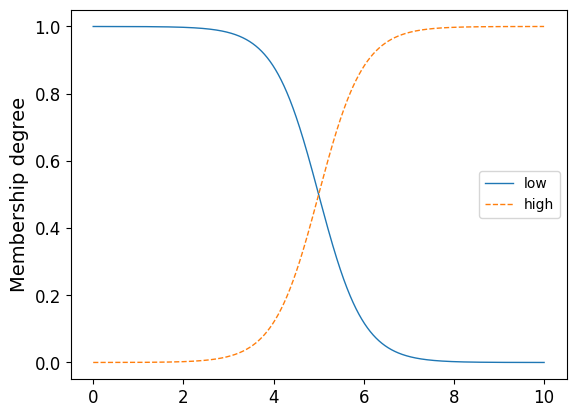

In [ ]:
# Sigmoid
S_1 = sf.InvSigmoidFuzzySet(c=5, a=2, term="low")
S_2 = sf.SigmoidFuzzySet(c=5, a=2, term="high")
sf.LinguisticVariable([S_1, S_2], universe_of_discourse=[0, 10]).plot()

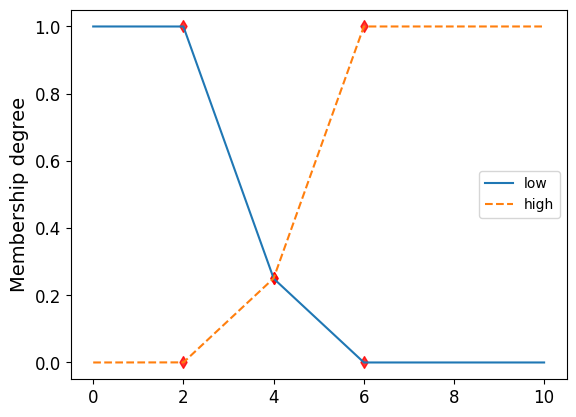

In [ ]:
# Poligono personalizado
P_1 = sf.FuzzySet(points=[[2.0, 1.0], [4.0, 0.25], [6.0, 0.0]], term="low")
P_2 = sf.FuzzySet(points=[[2.0, 0.0], [4.0, 0.25], [6.0, 1.0]], term="high")
sf.LinguisticVariable([P_1, P_2], universe_of_discourse=[0, 10]).plot()

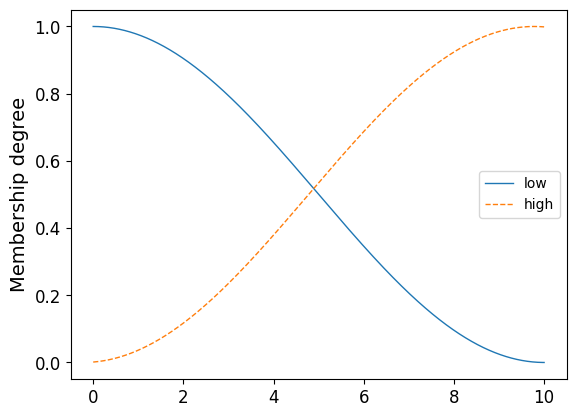

In [ ]:
# Funcao de pertinencia personalizada
import numpy as np
def fun1(x):
	return 0.5*np.cos(0.314*x)+0.5
def fun2(x):
	return 0.5*np.sin(0.314*x-1.5)+0.5

F_1 = sf.FuzzySet(function=fun1, term="low")
F_2 = sf.FuzzySet(function=fun2, term="high")
sf.LinguisticVariable([F_1, F_2], universe_of_discourse=[0, 10]).plot()

##### Agregação de áreas

*Ativação de regras*

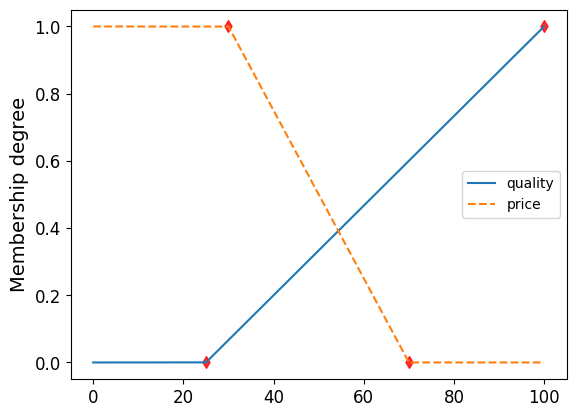

In [ ]:
from simpful import FuzzySet, FuzzyAggregator
from numpy import prod, mean, max, min

#Criar um objeto fuzzy agregador
A = FuzzyAggregator(verbose=True)

#Definicao de alguns conjuntos fuzzy
FS1 = FuzzySet(points=[[25,0], [100, 1]],	term="quality")
FS2 = FuzzySet(points=[[30,1], [70, 0]], 	term="price")

sf.LinguisticVariable([FS1, FS2], universe_of_discourse=[0, 100]).plot()

In [ ]:
#Add fuzzy sets objects to FuzzyAggregator
A.add_variables(FS1,FS2)

#Set numerical name of variables
A.set_variable("quality", 55)
A.set_variable("price", 42)

#Realizar agregacao. Metodos disponiveis: product, min, max, arit_mean. Accepts pointer to an aggregation function.
result = A.aggregate(["quality", "price"], aggregation_fun='product')

print("Result:", result)

 * Variable quality set to 55.000000
 * Variable price set to 42.000000
 * Aggregating the following values: [0.4, 0.7]
 * Using aggregation function: product
Result: 0.27999999999999997




---



---


---



---



---



---



---



---





---



---



#### Aula 2 - Métodos de inferência: Mamdani

Declarando o modelo

In [ ]:
from simpful import *

# A simple fuzzy inference system for the tipping problem
# Create a fuzzy system object
FS = FuzzySystem()

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.11.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)



Definindo as variáveis de entrada

1. Qualidade do serviço (*Service quality*)

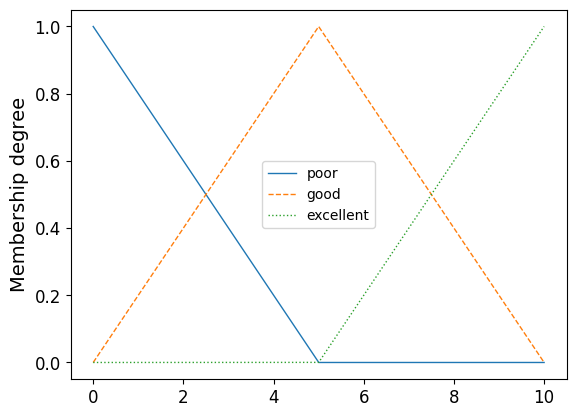

In [ ]:
S_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=5), term="poor") # saida = [0% 100% 0%]
S_2 = FuzzySet(function=Triangular_MF(a=0, b=5, c=10), term="good")
S_3 = FuzzySet(function=Triangular_MF(a=5, b=10, c=10), term="excellent")
FS.add_linguistic_variable("Service", LinguisticVariable([S_1, S_2, S_3], concept="Service quality", universe_of_discourse=[0,10]))

sf.LinguisticVariable([S_1, S_2, S_3], universe_of_discourse=[0, 10]).plot()

2. Qualidade da comida (*Food quality*)

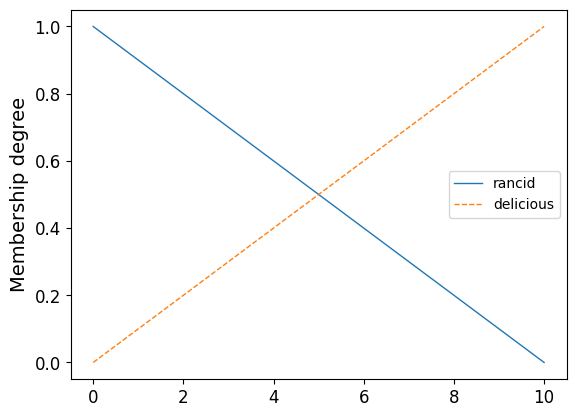

In [ ]:
F_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=10), term="rancid")
F_2 = FuzzySet(function=Triangular_MF(a=0, b=10, c=10), term="delicious")
FS.add_linguistic_variable("Food", LinguisticVariable([F_1, F_2], concept="Food quality", universe_of_discourse=[0,10]))

sf.LinguisticVariable([F_1,F_2], universe_of_discourse=[0, 10]).plot()

Definindo a variável de saída

Gorjeta (Tip)

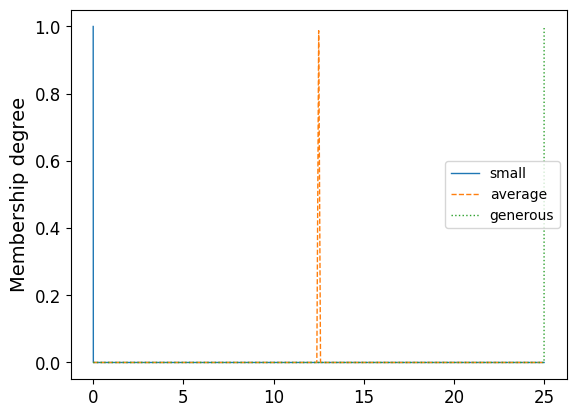

In [ ]:
T_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=0.0001), term="small")
T_2 = FuzzySet(function=Triangular_MF(a=12.4, b=12.5, c=12.6), term="average")
T_3 = FuzzySet(function=Trapezoidal_MF(a=24.999, b=25, c=25, d=25.1), term="generous") # [0%, 100%, 100%, 0%]
FS.add_linguistic_variable("Tip", LinguisticVariable([T_1, T_2, T_3], universe_of_discourse=[0,25]))

sf.LinguisticVariable([T_1, T_2, T_3], universe_of_discourse=[0, 25]).plot()

Definindo a base de regras
1. SE Serviço é Ruim E Comida é Ruim, ENTÃO Gojeta é Pequena
2. SE Serviço é Bom, ENTÃO Gojerta é Média
3. SE Serviço é Excelente OU Comida é Deliciosa, ENTÃO Gojeta é Generosa

In [ ]:
R1 = "IF (Service IS poor) AND (Food IS rancid) THEN (Tip IS small)"
R2 = "IF (Service IS good) THEN (Tip IS average)"
R3 = "IF (Service IS excellent) OR (Food IS delicious) THEN (Tip IS generous)"
FS.add_rules([R1, R2, R3])

Repassando os valores de entrada

Serviço = 4
Comida = 8

In [ ]:
FS.set_variable("Service", 4)
FS.set_variable("Food", 8)

Calculando o valor de inferência

In [ ]:
print(FS.Mamdani_inference(["Tip"]))

{'Tip': 14.047589540215647}


#### Métodos de inferência: Takagi-Sugeno-Kang

In [ ]:
from simpful import *

# A simple fuzzy inference system for the tipping problem
# Create a fuzzy system object
FS_TS = FuzzySystem()

# Define fuzzy sets and linguistic variables
S_1 = FuzzySet(points=[[0., 1.],  [5., 0.]], term="poor")
S_2 = FuzzySet(points=[[0., 0.], [5., 1.], [10., 0.]], term="good")
S_3 = FuzzySet(points=[[5., 0.],  [10., 1.]], term="excellent")
FS_TS.add_linguistic_variable("Service", LinguisticVariable([S_1, S_2, S_3], concept="Service quality"))

F_1 = FuzzySet(points=[[0., 1.],  [10., 0.]], term="rancid")
F_2 = FuzzySet(points=[[0., 0.],  [10., 1.]], term="delicious")
FS_TS.add_linguistic_variable("Food", LinguisticVariable([F_1, F_2], concept="Food quality"))

# Define output crisp values
FS_TS.set_crisp_output_value("small", 5)
FS_TS.set_crisp_output_value("average", 15)

# Define function for generous tip (food score + service score + 5%)
FS_TS.set_output_function("generous", "1*Food+1*Service+5")

# Define fuzzy rules
R1 = "IF (Service IS poor) AND (Food IS rancid) THEN (Tip IS small)"
R2 = "IF (Service IS good) THEN (Tip IS average)"
R3 = "IF (Service IS excellent) OR (Food IS delicious) THEN (Tip IS generous)"
FS_TS.add_rules([R1, R2, R3])

# Set antecedents values
FS_TS.set_variable("Service", 4)
FS_TS.set_variable("Food", 8)

# Perform Sugeno inference and print output
print(FS_TS.Sugeno_inference(["Tip"]))

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.11.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)

 * Detected Sugeno model type
{'Tip': 14.777777777777779}


##### Superfície fuzzy

*Combinação de todas as entradas possíveis*

Comparação entre o problema com inferência Mamdani e TS

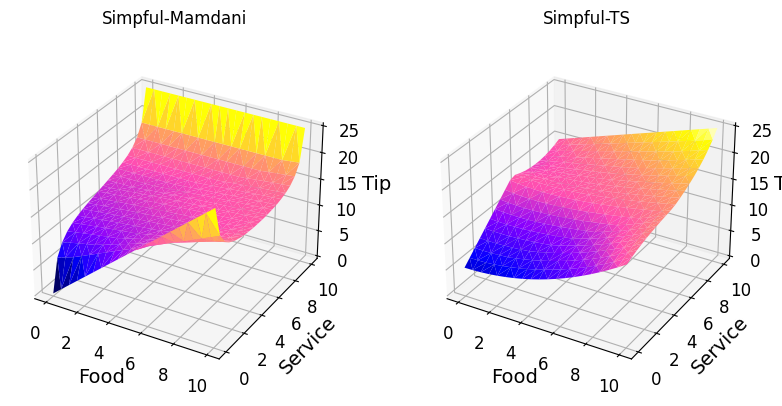

In [ ]:
import matplotlib.pylab as pltpy
from numpy import linspace, array
# Plotting surface
xs = []
ys = []
zs = []
DIVs = 20
for x in linspace(0,10,DIVs):
	for y in linspace(0,10,DIVs):
		FS.set_variable("Food", x)
		FS.set_variable("Service", y)
		tip = FS.inference()['Tip']
		xs.append(x)
		ys.append(y)
		zs.append(tip)
xs = array(xs)
ys = array(ys)
zs = array(zs)

from mpl_toolkits.mplot3d import Axes3D
fig = pltpy.figure(figsize=(10, 4))
fs_mam = fig.add_subplot(1,2,1, projection='3d')

xx, yy = pltpy.meshgrid(xs,ys)

fs_mam.plot_trisurf(xs,ys,zs, vmin=0, vmax=25, cmap='gnuplot2')
fs_mam.set_xlabel("Food")
fs_mam.set_ylabel("Service")
fs_mam.set_zlabel("Tip")
fs_mam.set_title("Simpful-Mamdani", pad=20)
fs_mam.set_zlim(0, 25)
pltpy.tight_layout()

xs = []
ys = []
zs_TS = []
DIVs = 20
for x in linspace(0,10,DIVs):
	for y in linspace(0,10,DIVs):
		FS_TS.set_variable("Food", x)
		FS_TS.set_variable("Service", y)
		tip = FS_TS.inference()['Tip']
		xs.append(x)
		ys.append(y)
		zs_TS.append(tip)
xs = array(xs)
ys = array(ys)
zs_TS = array(zs_TS)

fs_ts = fig.add_subplot(1,2,2, projection='3d')

fs_ts.plot_trisurf(xs,ys,zs_TS, vmin=0, vmax=25, cmap='gnuplot2')
fs_ts.set_xlabel("Food")
fs_ts.set_ylabel("Service")
fs_ts.set_zlabel("Tip")
fs_ts.set_title("Simpful-TS", pad=20)
fs_ts.set_zlim(0, 25)
pltpy.tight_layout()

pltpy.show()